In [98]:
# Load the dataset from CSV file.  

import pandas as pd 

dataset = pd.read_csv("../data/Airplane.csv" , index_col = 0)

dataset.sample()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
20757,67347,Male,Loyal Customer,38,Personal Travel,Eco,1471,3,4,3,...,3,3,4,4,5,4,3,0,0.0,neutral or dissatisfied


In [ ]:
# Determine the type of each column (categorical vs numerical). 

columns_data_type = {"Descriptive" : {} , "Numerical_int" : {} , "Numerical_float" : {}}

def data_type_detection():

    dataset_dtypes = dataset.dtypes 
    numerical = ["int","float"] 

    for column in list(dataset.columns)[1:] : 
        if dataset_dtypes[column] in [int,float] :
            columns_data_type["Numerical_"+numerical[int(dataset_dtypes[column] == float)]][column] = dataset[column].nunique()
        else :
            columns_data_type["Descriptive"][column] = list(dataset[column].unique())

# Create summary for categorical columns : list of unique categories.  

def descriptive_dataframe():
    
    print("Descriptive :")
    descriptive_df = { "categories" : [] }

    for column in columns_data_type["Descriptive"].keys():
        descriptive_df["categories"].append(columns_data_type["Descriptive"][column])

    descriptive_df = pd.DataFrame(descriptive_df , index = list(columns_data_type["Descriptive"].keys()))
    descriptive_df["number of categories"] = descriptive_df.categories.apply(lambda x : len(x))
    print(descriptive_df)
    return descriptive_df

# Create summary for numerical columns : number of unique values and value range. 

def numerical_dataframe():
    
    for data_type in list(columns_data_type.keys())[1:]:
        print(f"{data_type} :")
        numerical_df = {"number of unique values" : [] , "range" : []}
        for column in columns_data_type[data_type].keys():
            numerical_df["number of unique values"].append(columns_data_type[data_type][column])
            numerical_df["range"].append((dataset[column].min(),dataset[column].max()))
        numerical_df = pd.DataFrame(numerical_df , index = list(columns_data_type[data_type].keys()))
        print(numerical_df)
    
data_type_detection()
descriptive_df = descriptive_dataframe()
numerical_dataframe()

Descriptive :
                                          categories  number of categories
Gender                                [Male, Female]                     2
Customer Type    [Loyal Customer, disloyal Customer]                     2
Type of Travel    [Personal Travel, Business travel]                     2
Class                      [Eco Plus, Business, Eco]                     3
satisfaction    [neutral or dissatisfied, satisfied]                     2
Numerical_int :
                                   number of unique values       range
Age                                                     75     (7, 85)
Flight Distance                                       3802  (31, 4983)
Inflight wifi service                                    6      (0, 5)
Departure/Arrival time convenient                        6      (0, 5)
Ease of Online booking                                   6      (0, 5)
Gate location                                            6      (0, 5)
Food and drink         

In [100]:
# Calculate the number and percentage of missing values per column.  

def columns_missing_count():
    
    columns_missing = {"num_missing" : [] }

    for column in list(dataset.columns)[1:] :
        columns_missing["num_missing"].append(dataset[column].isnull().sum())
    
    columns_missing = pd.DataFrame(columns_missing , index = list(dataset.columns)[1:])
    columns_missing["missing_percentage"] = columns_missing["num_missing"] / dataset.shape[0] * 100
    print(columns_missing)

columns_missing_count()

                                   num_missing  missing_percentage
Gender                                       0            0.000000
Customer Type                                0            0.000000
Age                                          0            0.000000
Type of Travel                               0            0.000000
Class                                        0            0.000000
Flight Distance                              0            0.000000
Inflight wifi service                        0            0.000000
Departure/Arrival time convenient            0            0.000000
Ease of Online booking                       0            0.000000
Gate location                                0            0.000000
Food and drink                               0            0.000000
Online boarding                              0            0.000000
Seat comfort                                 0            0.000000
Inflight entertainment                       0            0.00

In [101]:
# Analyze numerical features : std , skewness , number of outliers.  

def count_outliers(column):

    Q1 = dataset[column].quantile(0.25)
    Q3 = dataset[column].quantile(0.75)
    IQR = Q3 - Q1
    return ((dataset[column] < Q1-IQR*1.5) | (dataset[column] > Q3+IQR*1.5)).sum()


def numerical_analysis():

    numerical_analysis_df = {"Std" : [] , "Skew" : [] , "Number of outliers" : []} 

    for data_type in list(columns_data_type.keys())[1:]:
        for column in columns_data_type[data_type].keys():
            numerical_analysis_df["Std"].append(dataset[column].std())
            numerical_analysis_df["Skew"].append(dataset[column].skew())
            numerical_analysis_df["Number of outliers"].append(count_outliers(column))

    numerical_analysis_df = pd.DataFrame(numerical_analysis_df , index = list(columns_data_type["Numerical_int"].keys())+list(columns_data_type["Numerical_float"].keys()))
    return numerical_analysis_df 

numerical_analysis_df = numerical_analysis()
print(numerical_analysis_df)

                                          Std      Skew  Number of outliers
Age                                 15.114964 -0.004516                   0
Flight Distance                    997.147281  1.109466                2291
Inflight wifi service                1.327829  0.040408                   0
Departure/Arrival time convenient    1.525075 -0.334399                   0
Ease of Online booking               1.398929 -0.018294                   0
Gate location                        1.277621 -0.058889                   0
Food and drink                       1.329533 -0.151279                   0
Online boarding                      1.349509 -0.453852                   0
Seat comfort                         1.319088 -0.482775                   0
Inflight entertainment               1.332991 -0.365131                   0
On-board service                     1.288354 -0.420031                   0
Leg room service                     1.315605 -0.350231                   0
Baggage hand

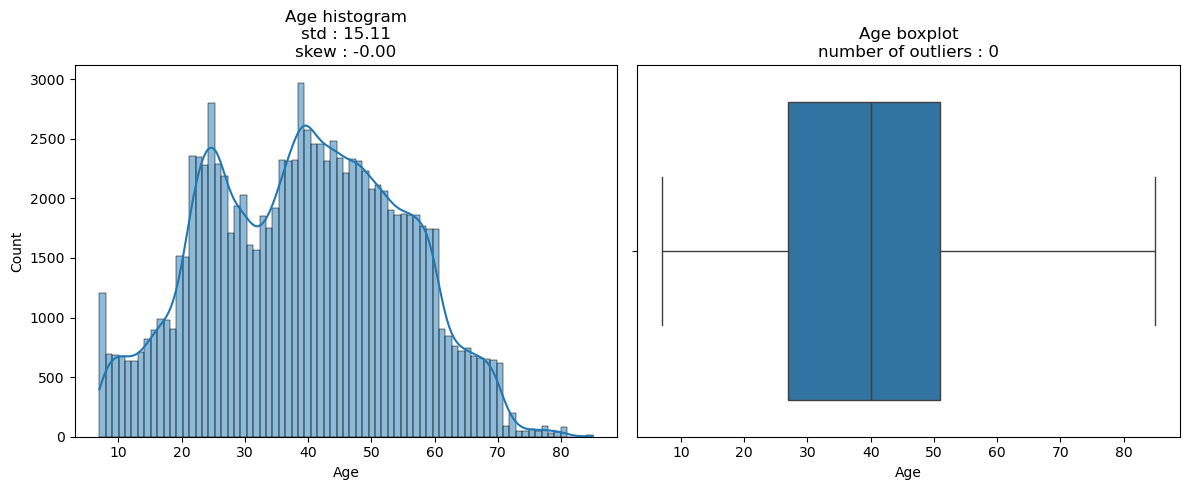

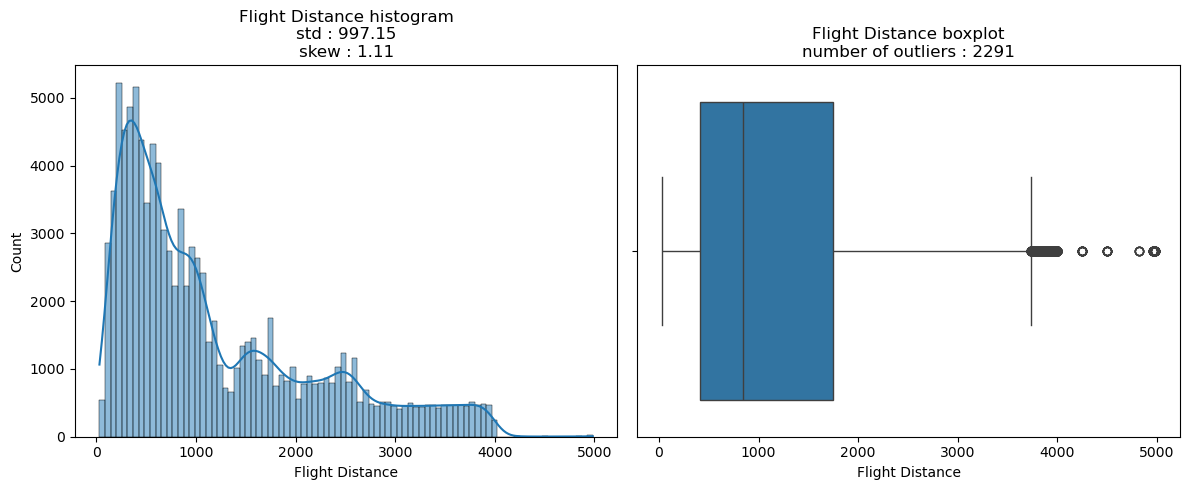

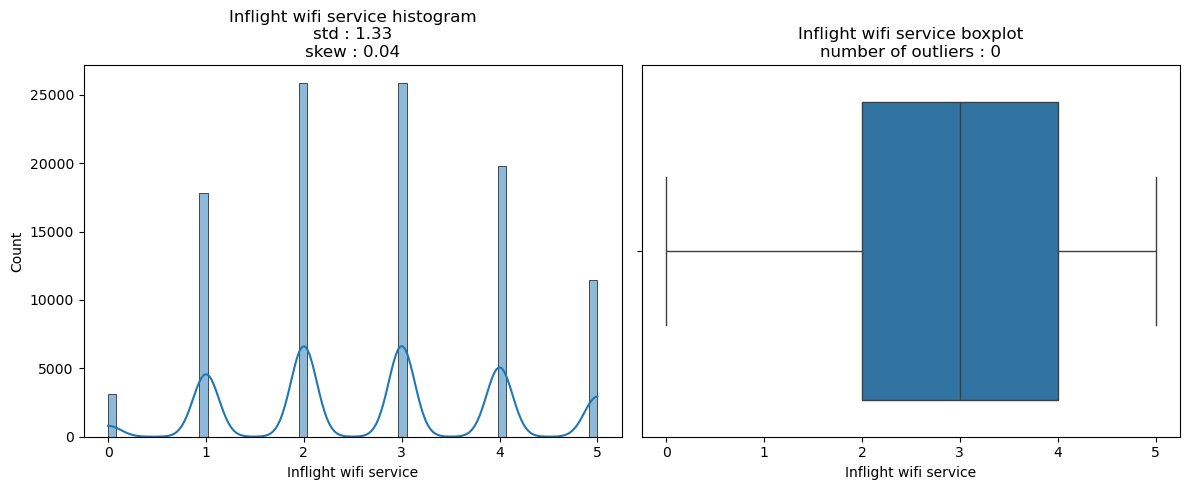

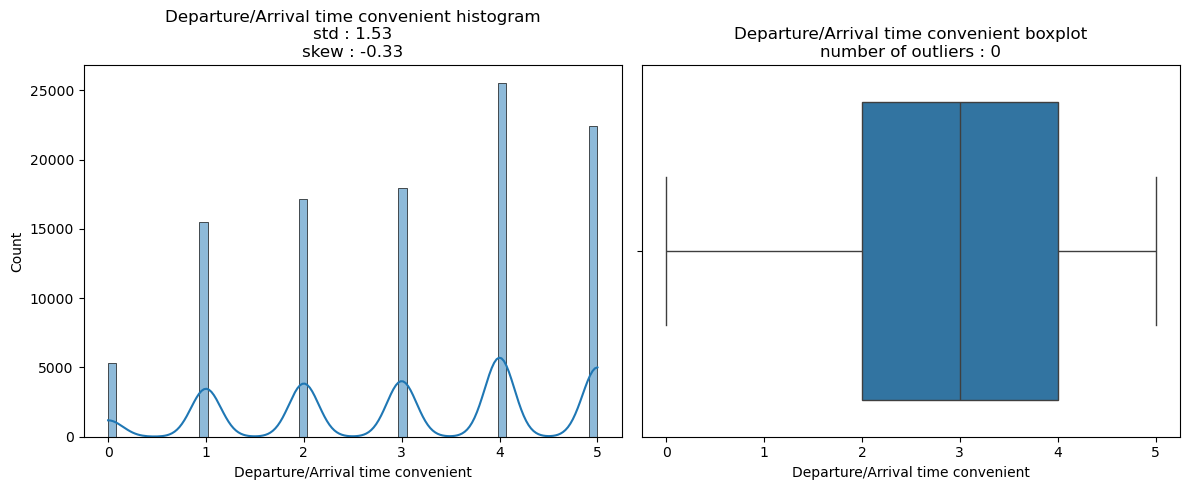

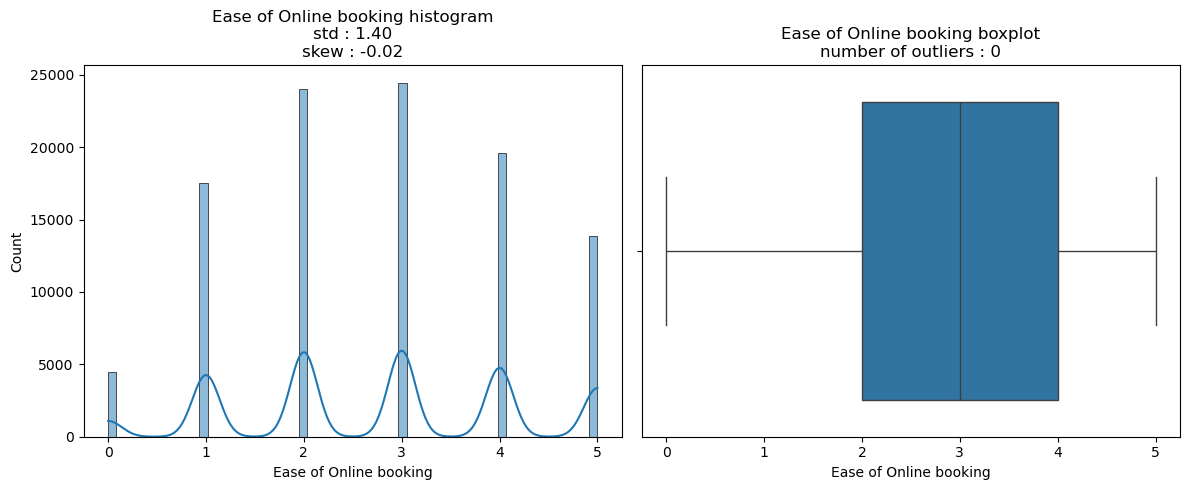

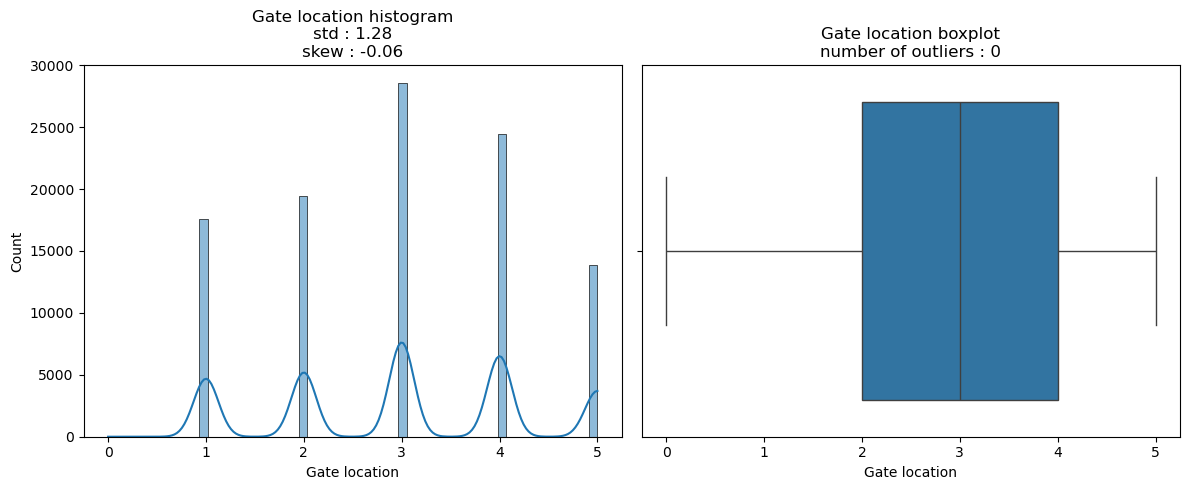

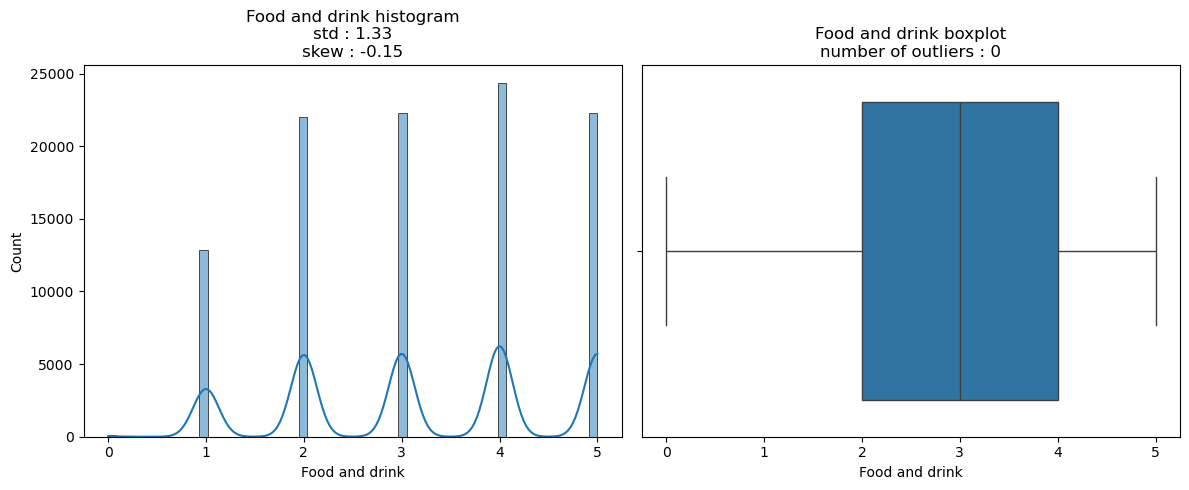

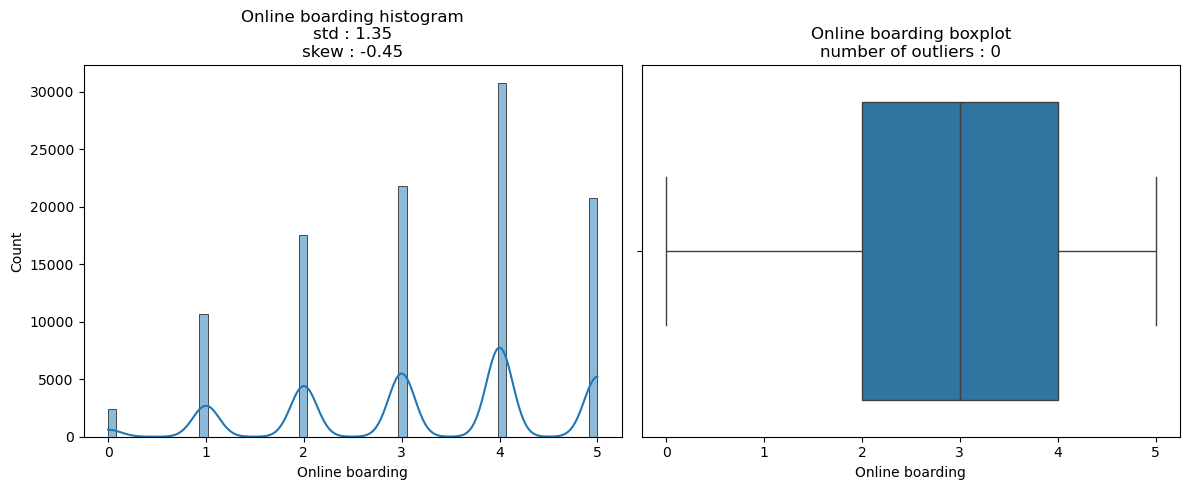

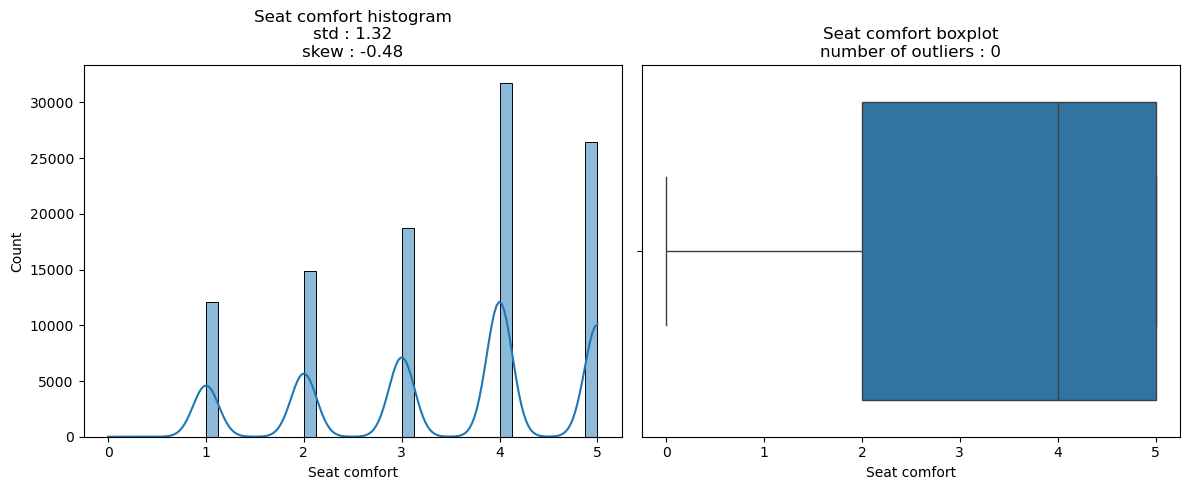

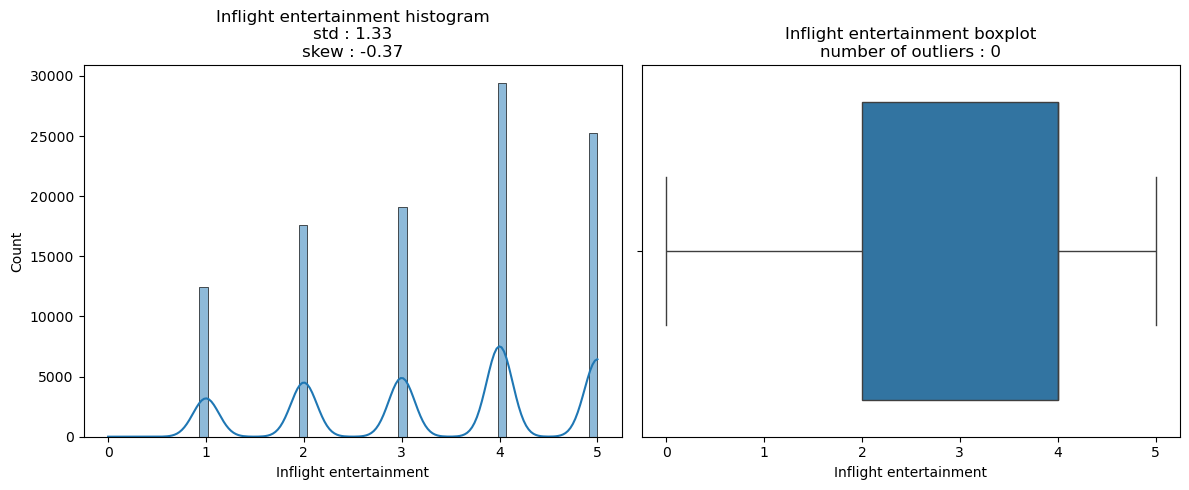

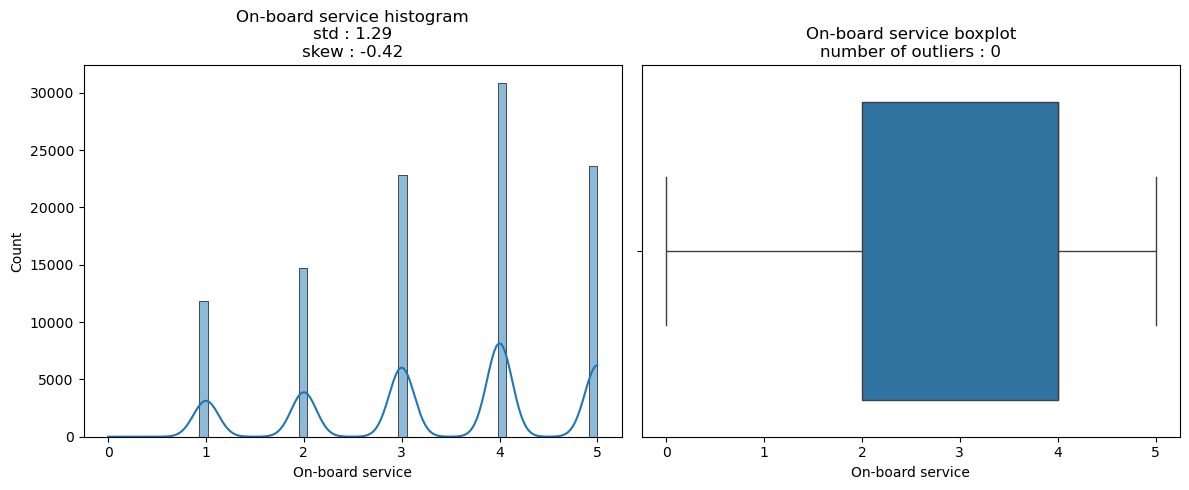

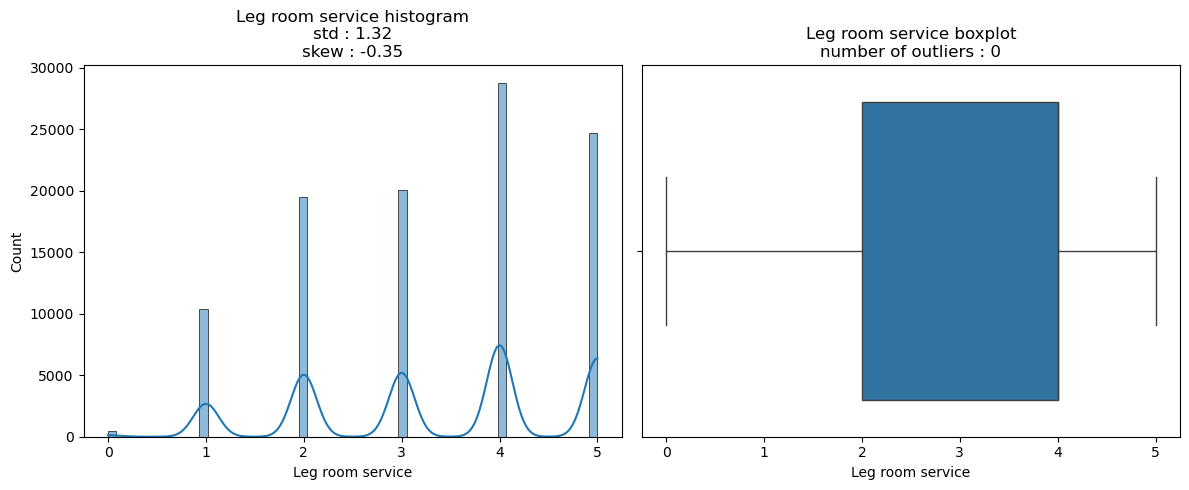

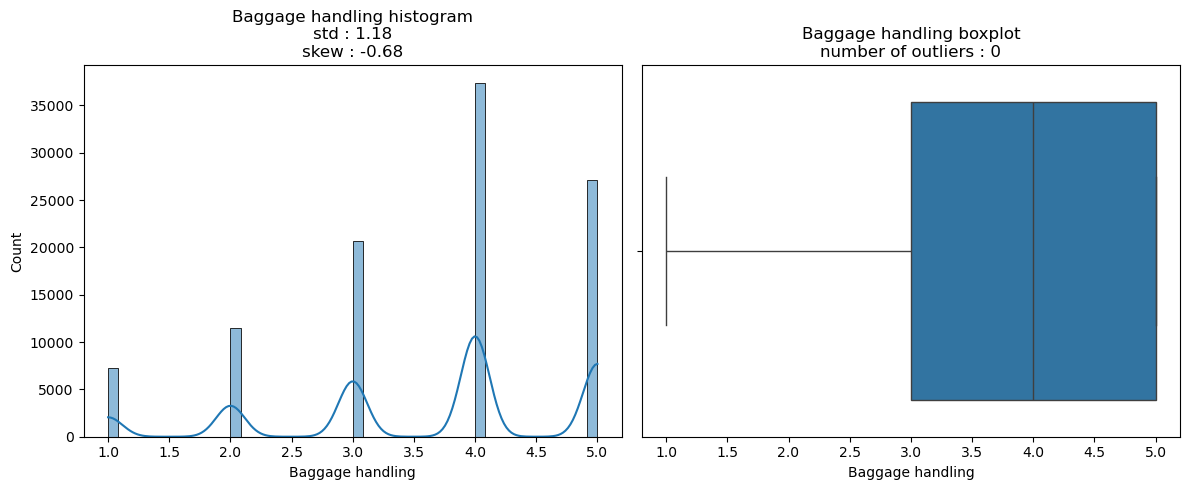

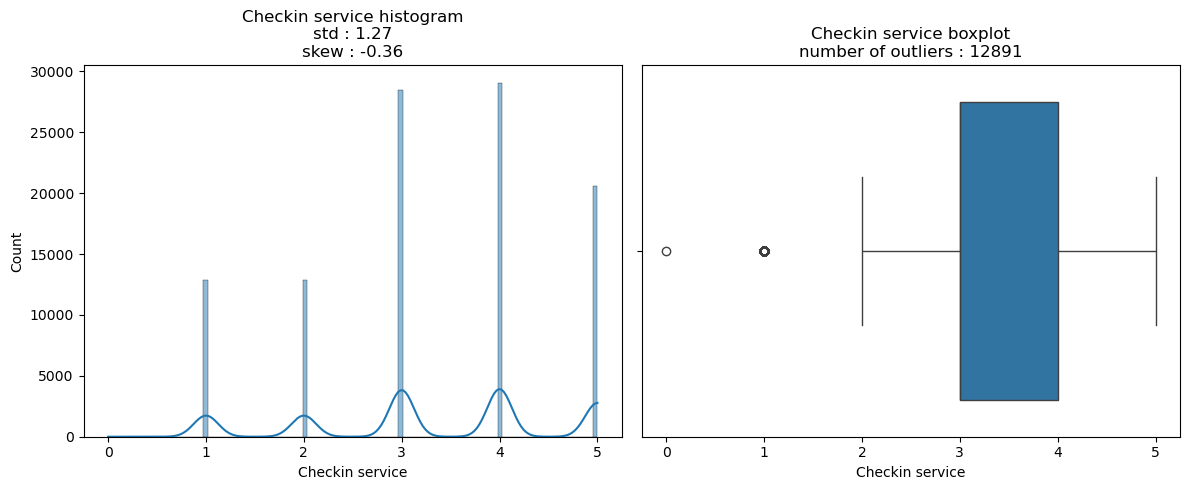

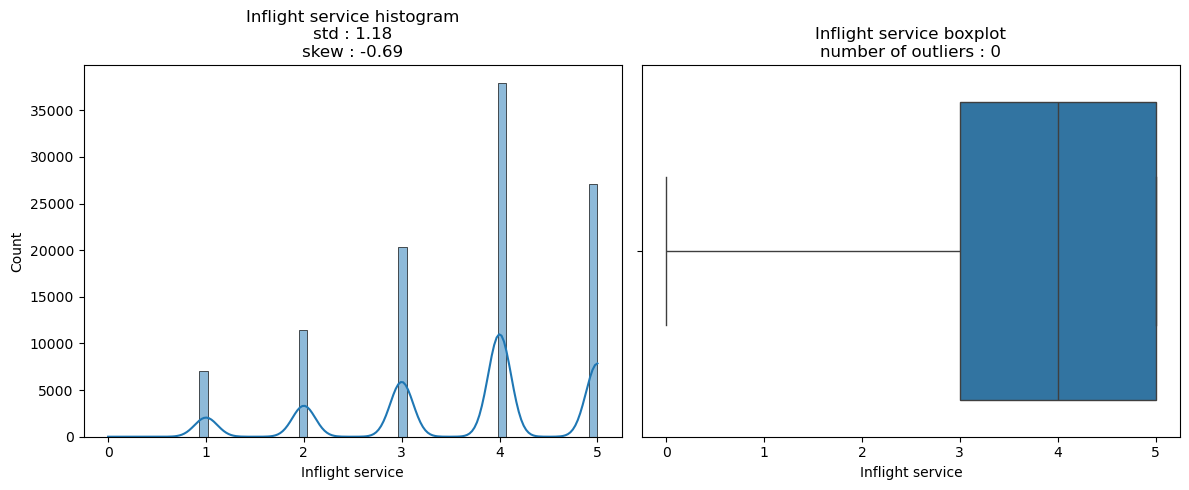

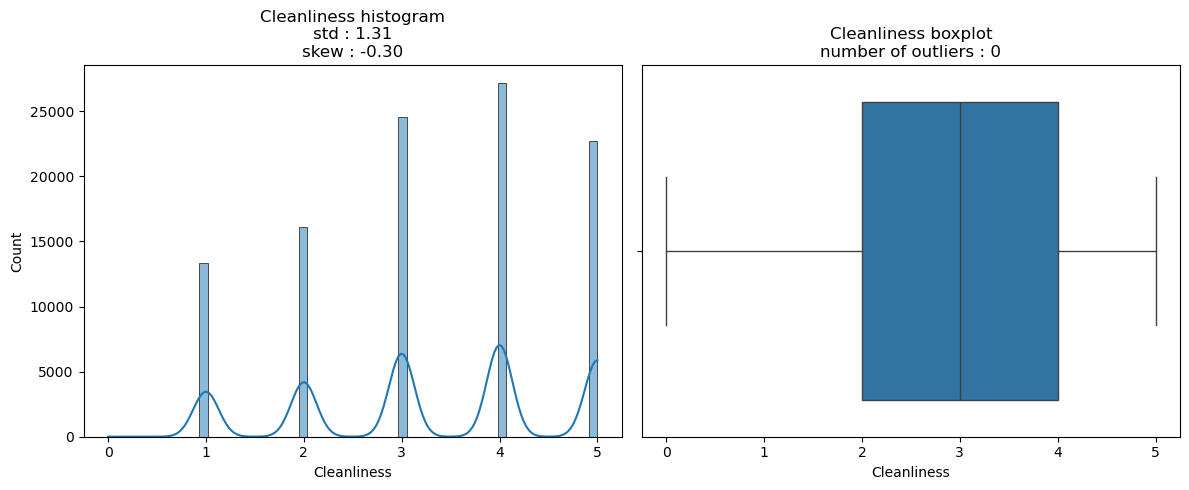

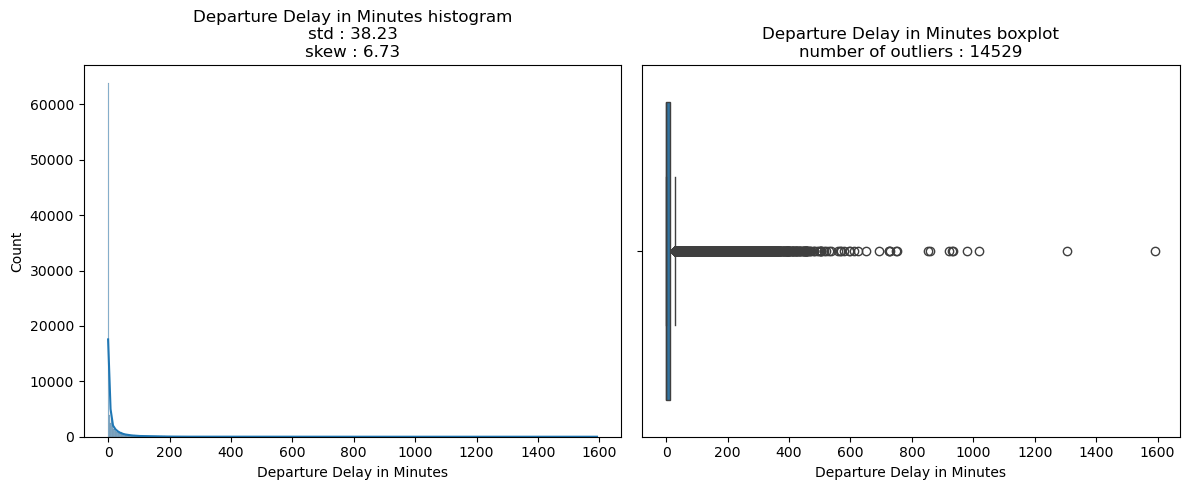

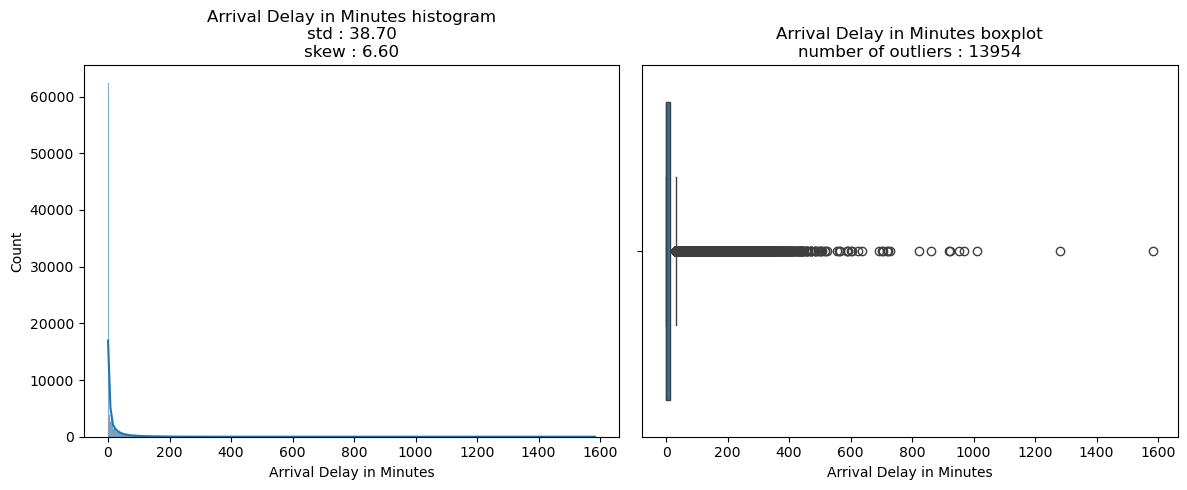

In [102]:
# Visualize numerical features using histogram and boxplot.  

import seaborn as sns 

import matplotlib.pyplot as plt 

def numericals_plot():

    for data_type in ["Numerical_int" , "Numerical_float"]:        
        for column in columns_data_type[data_type].keys():
            plt.figure(figsize = (12,5))

            plt.subplot(1,2,1)
            sns.histplot(dataset[column] , kde = True)
            plt.title(f"{column} histogram\nstd : {numerical_analysis_df.loc[column,"Std"]:.2f}\nskew : {numerical_analysis_df.loc[column,"Skew"]:.2f}")

            plt.subplot(1,2,2)
            sns.boxplot(x = dataset[column])
            plt.title(f"{column} boxplot\nnumber of outliers : {numerical_analysis_df.loc[column,"Number of outliers"]}")

            plt.tight_layout()
            plt.show()

numericals_plot()

In [103]:
# Analyze distribution of categorical columns. 

def descriptive_analysis():

    descriptive_analysis_df = {"distribution of categories" : []}

    for column in columns_data_type["Descriptive"].keys():
        distro = list(dataset.groupby(column).agg({column : "count"})[column]/dataset.shape[0]*100)
        distro = [float(f"{x:.2f}") for x in distro]
        descriptive_analysis_df["distribution of categories"].append(tuple(distro)) 

    descriptive_analysis_df = pd.DataFrame(descriptive_analysis_df , index = list(columns_data_type["Descriptive"].keys()))
    return descriptive_analysis_df

descriptive_analysis_df = descriptive_analysis()
print(descriptive_analysis_df)

               distribution of categories
Gender                     (50.75, 49.25)
Customer Type              (81.73, 18.27)
Type of Travel             (68.96, 31.04)
Class                 (47.8, 44.99, 7.21)
satisfaction               (56.67, 43.33)


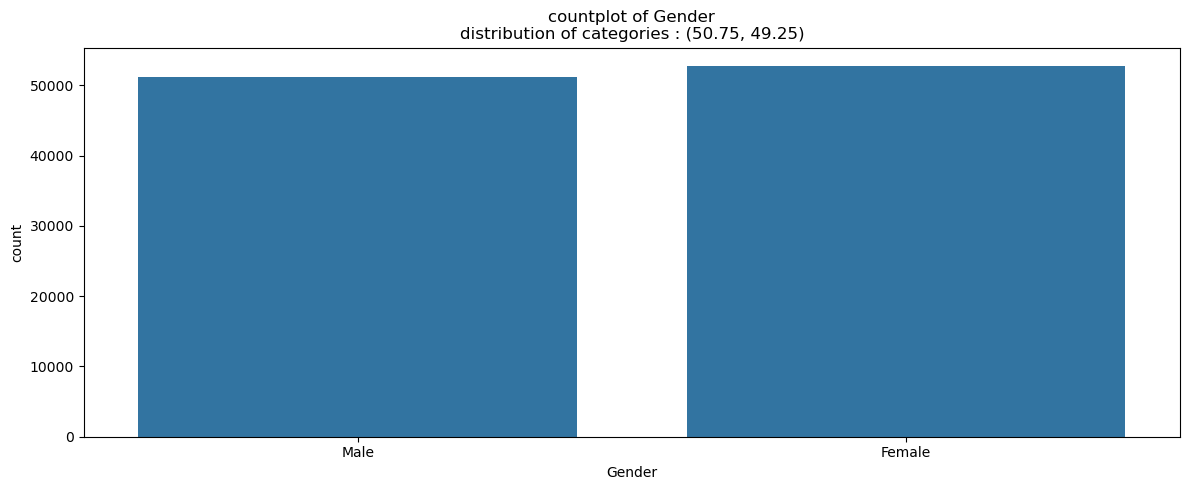

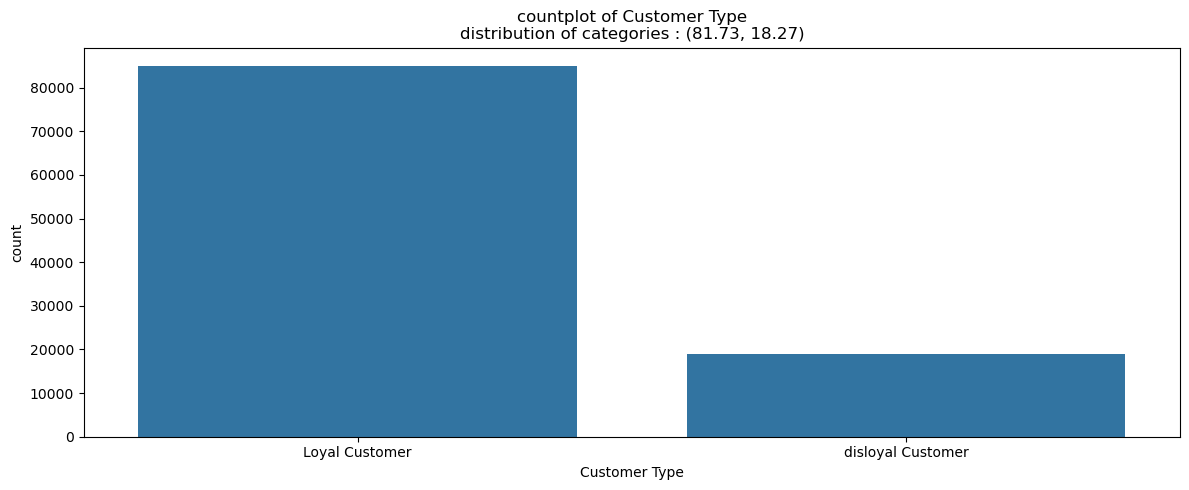

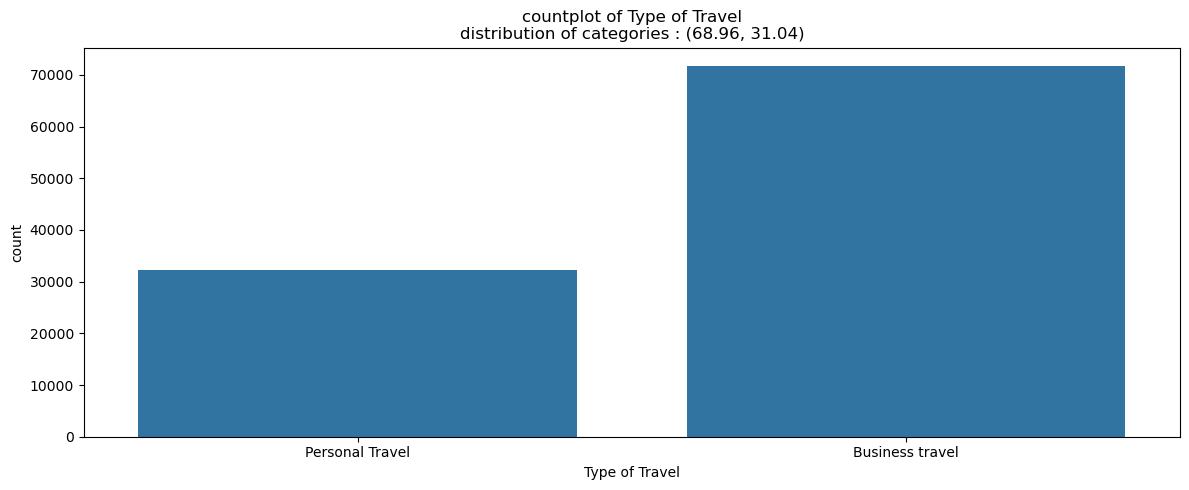

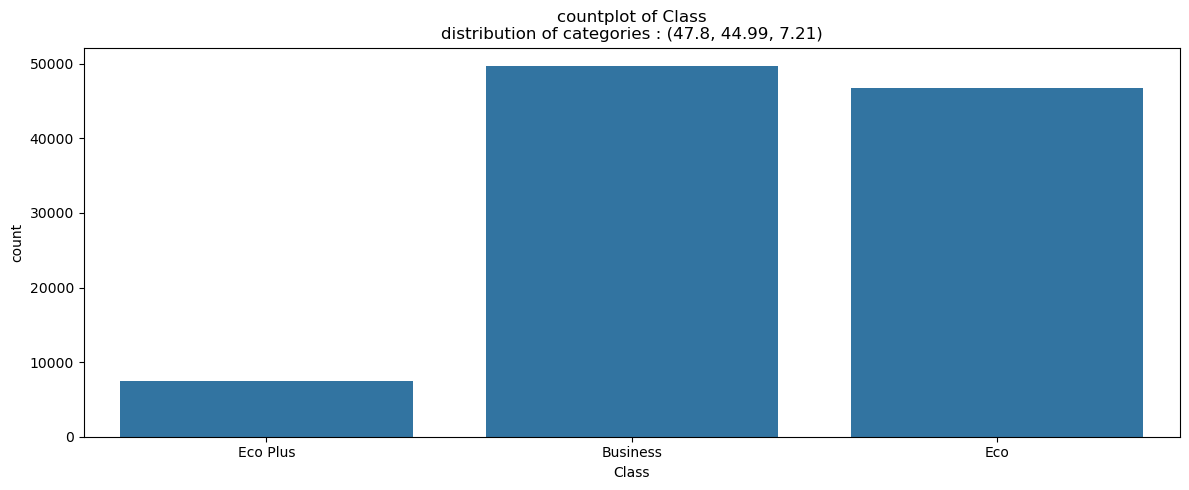

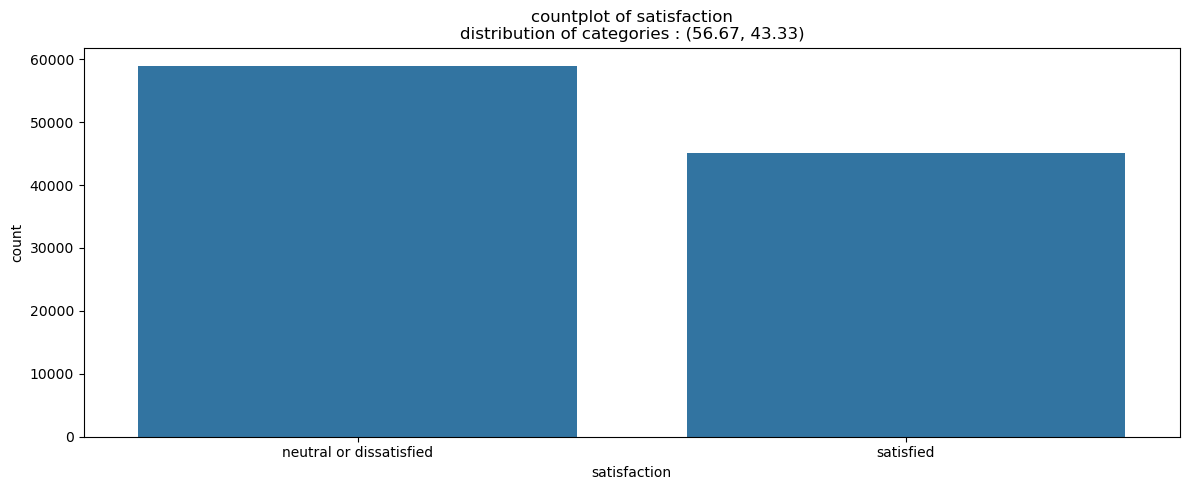

In [104]:
# Visualize categorical columns using countplot.  

def descriptives_plot():
    for column in columns_data_type["Descriptive"].keys():
        plt.figure(figsize = (12,5))
        sns.countplot(x = column , data = dataset)
        plt.title(f"countplot of {column}\ndistribution of categories : {descriptive_analysis_df.loc[column,"distribution of categories"]}")
        plt.tight_layout()
        plt.show()

descriptives_plot()